# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using `files_for_lab/Customer-Churn.csv` file.

### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `churnData`.
- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Scale the features either by using normalizer or a standard scaler.
  - Split the data into a training set and a test set.
  - Fit a logistic regression model on the training data.
  - Check the accuracy on the test data.

**Note**: So far we have not balanced the data.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.



In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [2]:
churn_data = pd.read_csv('W7 - D3 - Customer-Churn.csv')
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

In [5]:
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
churn_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
churn_data.shape

(7043, 16)

There are only 11 missing values from 7043, so I will drop them. 

In [8]:
data = churn_data.dropna(axis='index')

In [9]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
numerical = data.select_dtypes(include=['int64', 'float64'])
numerical.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [13]:
transformer = StandardScaler().fit(numerical)
num_standarized = transformer.transform(numerical)
num_standarized = pd.DataFrame(num_standarized)
num_standarized.columns = num_standarized.columns.astype(str)
num_standarized.rename(columns={'0':'SeniorCitizen', '1':'tenure', '2':'MonthlyCharges', '3':'TotalCharges'}, inplace=True)
num_standarized.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.440327,-1.280248,-1.161694,-0.994194
1,-0.440327,0.064303,-0.260878,-0.173740
2,-0.440327,-1.239504,-0.363923,-0.959649
3,-0.440327,0.512486,-0.747850,-0.195248
4,-0.440327,-1.239504,0.196178,-0.940457


In [21]:
y = data['Churn']

#### Split data into train and test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(num_standarized, y, test_size=0.3, random_state=100)

In [27]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

In [29]:
predictions = classification.predict(X_test)

Confusion Matrix: 


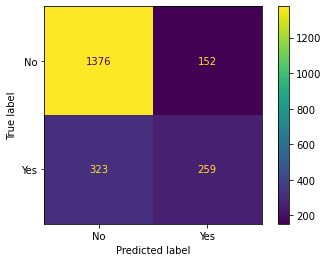

----------------------------------------------------
The accuracy of the model on test set is: 0.77 
----------------------------------------------------
The Kappa of your model is: 0.38
----------------------------------------------------
Classification report:
              precision    recall  f1-score   support

          No       0.90      0.81      0.85      1699
         Yes       0.45      0.63      0.52       411

    accuracy                           0.77      2110
   macro avg       0.67      0.72      0.69      2110
weighted avg       0.81      0.77      0.79      2110



In [43]:
#print(confusion_matrix(y_test, predictions))
print('Confusion Matrix: ')
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print('----------------------------------------------------')

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print('----------------------------------------------------')

print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))
print('----------------------------------------------------')

print('Classification report:')
print(classification_report(predictions,y_test)) 

#### Checking inbalance in target variable

In [44]:
print(y.value_counts())

No     5163
Yes    1869
Name: Churn, dtype: int64


### Downsampling

In [47]:
data_down = pd.concat([numerical,y],axis=1)

category_y = data_down[data_down['Churn'] == 'Yes']
category_n = data_down[data_down['Churn'] == 'No']

# We pick a random sample of rows from of observations belonging to "category_0"
# in the same amount of observations belonging to "category_1"
category_n = category_n.sample(len(category_y))
print(category_n.shape)
print(category_y.shape)

data1 = pd.concat([category_n, category_y], axis=0)
#shuffling the data
data1 = data1.sample(frac=1)
data1['Churn'].value_counts()

(1869, 5)
(1869, 5)


Yes    1869
No     1869
Name: Churn, dtype: int64

In [54]:
x1 = data1.drop(['Churn'], axis=1)
y1 = data1['Churn']
x1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3548,0,71,97.65,6687.85
4810,1,15,89.85,1424.95
3565,0,1,50.75,50.75
6322,0,4,79.00,303.15
1343,0,64,73.05,4688.65


In [55]:
transformer = StandardScaler().fit(x1)
x1_standarized = transformer.transform(x1)
x1_standarized = pd.DataFrame(x1_standarized)
x1_standarized.columns = x1_standarized.columns.astype(str)
x1_standarized.rename(columns={'0':'SeniorCitizen', '1':'tenure', '2':'MonthlyCharges', '3':'TotalCharges'}, inplace=True)
x1_standarized.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.487594,1.782022,1.027564,2.106168
1,2.050885,-0.533177,0.754520,-0.289798
2,-0.487594,-1.111976,-0.614197,-0.915410
3,-0.487594,-0.987948,0.374710,-0.800504
4,-0.487594,1.492623,0.166427,1.196020


In [56]:
X_train, X_test, y_train, y_test = train_test_split(x1_standarized, y1, test_size=0.3, random_state=100)

In [57]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

In [58]:
predictions = classification.predict(X_test)

Confusion Matrix: 


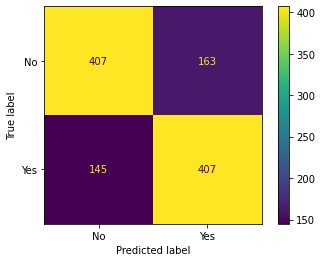

----------------------------------------------------
The accuracy of the model on test set is: 0.73 
----------------------------------------------------
The Kappa of your model is: 0.45
----------------------------------------------------
Classification report:
              precision    recall  f1-score   support

          No       0.71      0.74      0.73       552
         Yes       0.74      0.71      0.73       570

    accuracy                           0.73      1122
   macro avg       0.73      0.73      0.73      1122
weighted avg       0.73      0.73      0.73      1122



In [59]:
#print(confusion_matrix(y_test, predictions))
print('Confusion Matrix: ')
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print('----------------------------------------------------')

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print('----------------------------------------------------')

print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))
print('----------------------------------------------------')

print('Classification report:')
print(classification_report(predictions,y_test)) 

### Upsampling

In [76]:
data_up = pd.concat([numerical,y],axis=1)

category_y2 = data_up[data_down['Churn'] == 'Yes']
category_n2 = data_up[data_down['Churn'] == 'No']
category_y2 = category_y2.sample(len(category_n2), replace=True)

data2 = pd.concat([category_n2, category_y2], axis=0)
#shuffling the data
data1 = data2.sample(frac=1)
data2['Churn'].value_counts()

No     5163
Yes    5163
Name: Churn, dtype: int64

In [77]:
x2 = data2.drop(['Churn'], axis=1)
y2 = data2['Churn']
x2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
3,0,45,42.30,1840.75
6,0,22,89.10,1949.40
7,0,10,29.75,301.90


In [78]:
transformer = StandardScaler().fit(x2)
x2_standarized = transformer.transform(x2)
x2_standarized = pd.DataFrame(x2_standarized)
x2_standarized.columns = x2_standarized.columns.astype(str)
x2_standarized.rename(columns={'0':'SeniorCitizen', '1':'tenure', '2':'MonthlyCharges', '3':'TotalCharges'}, inplace=True)
x2_standarized.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.487224,-1.112626,-1.302665,-0.917950
1,-0.487224,0.261923,-0.364142,-0.062411
2,-0.487224,0.720106,-0.871499,-0.084838
3,-0.487224,-0.237913,0.749272,-0.034854
4,-0.487224,-0.737749,-1.306128,-0.792793


In [79]:
X_train, X_test, y_train, y_test = train_test_split(x2_standarized, y2, test_size=0.3, random_state=100)

In [80]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

In [81]:
predictions = classification.predict(X_test)

Confusion Matrix: 


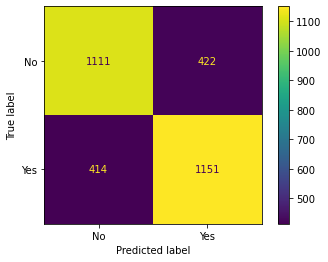

----------------------------------------------------
The accuracy of the model on test set is: 0.73 
----------------------------------------------------
The Kappa of your model is: 0.46
----------------------------------------------------
Classification report:
              precision    recall  f1-score   support

          No       0.72      0.73      0.73      1525
         Yes       0.74      0.73      0.73      1573

    accuracy                           0.73      3098
   macro avg       0.73      0.73      0.73      3098
weighted avg       0.73      0.73      0.73      3098



In [82]:
#print(confusion_matrix(y_test, predictions))
print('Confusion Matrix: ')
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print('----------------------------------------------------')

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print('----------------------------------------------------')

print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))
print('----------------------------------------------------')

print('Classification report:')
print(classification_report(predictions,y_test)) 

### SMOTE

In [84]:
data_sm = pd.concat([numerical,y],axis=1)
smote = SMOTE()
y = data_sm['Churn']
X = data_sm.drop(['Churn'], axis=1)
X_sm, y_sm = smote.fit_sample(X, y)

unique, counts = np.unique(y_sm, return_counts=True)
print(np.asarray((unique, counts)).T)

[['No' 5163]
 ['Yes' 5163]]


In [87]:
transformer = StandardScaler().fit(X_sm)
X_sm_standarized = transformer.transform(X_sm)
X_sm_standarized = pd.DataFrame(X_sm_standarized)
X_sm_standarized.columns = X_sm_standarized.columns.astype(str)
X_sm_standarized.rename(columns={'0':'SeniorCitizen', '1':'tenure', '2':'MonthlyCharges', '3':'TotalCharges'}, inplace=True)
X_sm_standarized.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.398651,-1.107863,-1.319801,-0.919108
1,-0.398651,0.266041,-0.379483,-0.070028
2,-0.398651,-1.066229,-0.487047,-0.883358
3,-0.398651,0.724009,-0.887810,-0.092286
4,-0.398651,-1.066229,0.097615,-0.863496


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_sm_standarized, y_sm, test_size=0.3, random_state=100)

In [89]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

In [90]:
predictions = classification.predict(X_test)

Confusion Matrix: 


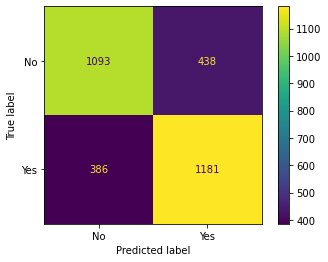

----------------------------------------------------
The accuracy of the model on test set is: 0.73 
----------------------------------------------------
The Kappa of your model is: 0.47
----------------------------------------------------
Classification report:
              precision    recall  f1-score   support

          No       0.71      0.74      0.73      1479
         Yes       0.75      0.73      0.74      1619

    accuracy                           0.73      3098
   macro avg       0.73      0.73      0.73      3098
weighted avg       0.73      0.73      0.73      3098



In [91]:
#print(confusion_matrix(y_test, predictions))
print('Confusion Matrix: ')
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print('----------------------------------------------------')

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print('----------------------------------------------------')

print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))
print('----------------------------------------------------')

print('Classification report:')
print(classification_report(predictions,y_test)) 

### Tomek's Links

In [85]:
tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(X, y)

unique, counts = np.unique(y_tl, return_counts=True)
print(np.asarray((unique, counts)).T)

[['No' 4609]
 ['Yes' 1869]]


C:\Users\yelam\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [92]:
transformer = StandardScaler().fit(X_tl)
X_tl_standarized = transformer.transform(X_tl)
X_tl_standarized = pd.DataFrame(X_tl_standarized)
X_tl_standarized.columns = X_tl_standarized.columns.astype(str)
X_tl_standarized.rename(columns={'0':'SeniorCitizen', '1':'tenure', '2':'MonthlyCharges', '3':'TotalCharges'}, inplace=True)
X_tl_standarized.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.435563,-1.294522,-1.124509,-0.993502
1,-0.435563,0.039534,-0.231056,-0.178615
2,-0.435563,-1.254096,-0.333259,-0.959192
3,-0.435563,0.484219,-0.714048,-0.199977
4,-0.435563,-1.254096,0.222264,-0.940130


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_tl_standarized, y_tl, test_size=0.3, random_state=100)

In [94]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

In [95]:
predictions = classification.predict(X_test)

Confusion Matrix: 


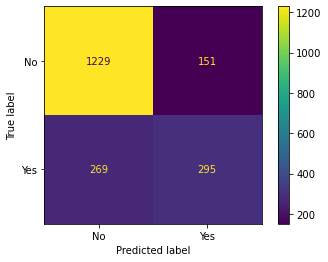

----------------------------------------------------
The accuracy of the model on test set is: 0.78 
----------------------------------------------------
The Kappa of your model is: 0.44
----------------------------------------------------
Classification report:
              precision    recall  f1-score   support

          No       0.89      0.82      0.85      1498
         Yes       0.52      0.66      0.58       446

    accuracy                           0.78      1944
   macro avg       0.71      0.74      0.72      1944
weighted avg       0.81      0.78      0.79      1944



In [96]:
#print(confusion_matrix(y_test, predictions))
print('Confusion Matrix: ')
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print('----------------------------------------------------')

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print('----------------------------------------------------')

print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))
print('----------------------------------------------------')

print('Classification report:')
print(classification_report(predictions,y_test)) 